In [1288]:
import pandas as pd
import numpy as np

In [1289]:
file = pd.read_excel(r"D:\database\LAPTOP DATASET1.xlsx")

In [1290]:
file

,IPS,Touchscreen,Company,TypeName,Inches,Ram,graphic_processor,GPU,gigah,OpSys,Weight,Price,core,CPU,screen_varity,primary_memory_1,primary_memory_type,Addition_memory,Screen_x,Screen_y
0,1,0,Apple,Ultrabook,13.3,8,Intel,Iris,2.3,macOS,1.37,71378.6832,i5,Intel,Retina Display,128,SSD,NaN,2560,1600
1,0,0,Apple,Ultrabook,13.3,8,Intel,HD,1.8,macOS,1.34,47895.5232,i5,Intel,Full HD,128,Flash Storage,NaN,1440,900
2,0,0,HP,Notebook,15.6,8,Intel,HD,2.5,No OS,1.86,30636.0000,i5,Intel,Full HD,256,SSD,NaN,1920,1080
3,1,0,Apple,Ultrabook,15.4,16,AMD,Radeon,2.7,macOS,1.83,135195.3360,i7,Intel,Retina Display,512,SSD,NaN,2880,1800
4,1,0,Apple,Ultrabook,13.3,8,Intel,Iris,3.1,macOS,1.37,96095.8080,i5,Intel,Retina Display,256,SSD,NaN,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1,1,Lenovo,2 in 1 Convertible,14.0,4,Intel,HD,2.5,Windows 10,1.80,33992.6400,i7,Intel,Full HD,128,SSD,NaN,1920,1080
1263,1,1,Lenovo,2 in 1 Convertible,13.3,16,Intel,HD,2.5,Windows 10,1.30,79866.7200,i7,Intel,Quad HD+,512,SSD,NaN,3200,1800
1264,0,0,Lenovo,Notebook,14.0,2,Intel,HD,1.6,Windows 10,1.50,12201.1200,Celeron,Intel,HD,64,Flash Storage,NaN,1366,768
1265,0,0,HP,Notebook,15.6,6,AMD,Radeon,2.5,Windows 10,2.19,40705.9200,i7,Intel,HD,1000,HDD,NaN,1366,768



# overview of data




# isnull

In [1291]:
file.isnull().sum()

IPS                       0
Touchscreen               0
Company                   0
TypeName                  0
Inches                    0
Ram                       0
graphic_processor         0
GPU                       0
gigah                     0
OpSys                     0
Weight                    0
Price                     0
core                      0
CPU                       0
screen_varity             0
primary_memory_1          0
primary_memory_type       0
Addition_memory        1066
Screen_x                  0
Screen_y                  0
dtype: int64

# Feature Engineering

# Additional Column

In [1292]:
file['Addition_memory'] = file['Addition_memory'].str.replace('1TB HDD', '1TBHDD')
file['Addition_memory'] = file['Addition_memory'].str.replace('2TB HDD', '2TBHDD')
file['Addition_memory'] = file['Addition_memory'].str.replace('256 SSD', '256SSD')
file['Addition_memory'] = file['Addition_memory'].str.replace('500 HDD', '500HDD')
file['Addition_memory'] = file['Addition_memory'].str.replace('1.0TB Hybrid', '1.0TBHybrid')
file['Addition_memory'] = file['Addition_memory'].str.replace('512SSD', '512SSD')

C:\Users\ravin\AppData\Local\Temp\ipykernel_3040\2518482212.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  file['Addition_memory'] = file['Addition_memory'].str.replace('1.0TB Hybrid', '1.0TBHybrid')


In [1293]:
fun1 = file['Addition_memory'].str.strip()

In [1294]:
fun1.unique()

array([nan, '1TBHDD', '256GB SSD', '2TBHDD', '500GB HDD', '512GB SSD',
       '2000B HDD', '1TB Hybrid'], dtype=object)

In [1295]:
list_hdd = []

In [1296]:

for i in fun1:
    
    if i == '1TBHDD':
        list_hdd.append(1024)
    elif i == '500HDD':
        list_hdd.append(500)
    elif i == '2TBHDD':
        list_hdd.append(2048)
    else:
        list_hdd.append(0)
        

In [1297]:
list_ssd = []

In [1298]:

for i in fun1:
    
    if i == '256SSD':
        list_ssd.append(256)
    elif i == '512 SSD':
        list_ssd.append(512)
    elif i == '128SSD':
        list_ssd.append(128)
    else:
        list_ssd.append(0)
        

In [1299]:
list_hybrid = []

In [1300]:

for i in fun1:
    
    if i == '1.0TBHybrid':
        list_hybrid.append(1024)
    else:
        list_hybrid.append(0)

In [1301]:
len(list_hybrid)

1267

In [1302]:
file['HDD_Aditional'] = list_hdd
file['SSD_Aditional'] = list_ssd

file['Hybrid_Aditional'] = list_hybrid

In [1303]:
file1 = file.drop(['Addition_memory'], axis=1)

In [1304]:
file1

,IPS,Touchscreen,Company,TypeName,Inches,Ram,graphic_processor,GPU,gigah,OpSys,...,core,CPU,screen_varity,primary_memory_1,primary_memory_type,Screen_x,Screen_y,HDD_Aditional,SSD_Aditional,Hybrid_Aditional
0,1,0,Apple,Ultrabook,13.3,8,Intel,Iris,2.3,macOS,...,i5,Intel,Retina Display,128,SSD,2560,1600,0,0,0
1,0,0,Apple,Ultrabook,13.3,8,Intel,HD,1.8,macOS,...,i5,Intel,Full HD,128,Flash Storage,1440,900,0,0,0
2,0,0,HP,Notebook,15.6,8,Intel,HD,2.5,No OS,...,i5,Intel,Full HD,256,SSD,1920,1080,0,0,0
3,1,0,Apple,Ultrabook,15.4,16,AMD,Radeon,2.7,macOS,...,i7,Intel,Retina Display,512,SSD,2880,1800,0,0,0
4,1,0,Apple,Ultrabook,13.3,8,Intel,Iris,3.1,macOS,...,i5,Intel,Retina Display,256,SSD,2560,1600,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1,1,Lenovo,2 in 1 Convertible,14.0,4,Intel,HD,2.5,Windows 10,...,i7,Intel,Full HD,128,SSD,1920,1080,0,0,0
1263,1,1,Lenovo,2 in 1 Convertible,13.3,16,Intel,HD,2.5,Windows 10,...,i7,Intel,Quad HD+,512,SSD,3200,1800,0,0,0
1264,0,0,Lenovo,Notebook,14.0,2,Intel,HD,1.6,Windows 10,...,Celeron,Intel,HD,64,Flash Storage,1366,768,0,0,0
1265,0,0,HP,Notebook,15.6,6,AMD,Radeon,2.5,Windows 10,...,i7,Intel,HD,1000,HDD,1366,768,0,0,0


# primary_memory_1

In [1305]:
SSD = []
HDD = []
Flash_Storage= []
Hybrid = []

In [1306]:
file1['primary_memory_1'].loc[3]

512

In [1307]:
for index, i in enumerate(file1['primary_memory_type']):
    if isinstance(i, str) and 'SSD' in i:
        SSD.append(file1['primary_memory_1'].loc[index])
    else:
        SSD.append(0)
        

In [1308]:
for index, i in enumerate(file1['primary_memory_type']):
    if isinstance(i, str) and 'HDD' in i:
        HDD.append(file1['primary_memory_1'].loc[index])
    else:
        HDD.append(0)

In [1309]:
for index, i in enumerate(file1['primary_memory_type']):
    if isinstance(i, str) and 'Flash Storage' in i:
        Flash_Storage.append(file1['primary_memory_1'].loc[index])
    else:
        Flash_Storage.append(0)

In [1310]:
for index, i in enumerate(file1['primary_memory_type']):
    if isinstance(i, str) and 'Hybrid' in i:
        Hybrid.append(file1['primary_memory_1'].loc[index])
    else:
        Hybrid.append(0)
        

In [1311]:
file1['SSD'] = SSD
file1['HDD'] = HDD
file1['Flash_Storage'] = Flash_Storage
file1['Hybrid'] = Hybrid

In [1312]:
file2 = file1.drop(['primary_memory_1','primary_memory_type'], axis=1)

In [1313]:
file2

,IPS,Touchscreen,Company,TypeName,Inches,Ram,graphic_processor,GPU,gigah,OpSys,...,screen_varity,Screen_x,Screen_y,HDD_Aditional,SSD_Aditional,Hybrid_Aditional,SSD,HDD,Flash_Storage,Hybrid
0,1,0,Apple,Ultrabook,13.3,8,Intel,Iris,2.3,macOS,...,Retina Display,2560,1600,0,0,0,128,0,0,0
1,0,0,Apple,Ultrabook,13.3,8,Intel,HD,1.8,macOS,...,Full HD,1440,900,0,0,0,0,0,128,0
2,0,0,HP,Notebook,15.6,8,Intel,HD,2.5,No OS,...,Full HD,1920,1080,0,0,0,256,0,0,0
3,1,0,Apple,Ultrabook,15.4,16,AMD,Radeon,2.7,macOS,...,Retina Display,2880,1800,0,0,0,512,0,0,0
4,1,0,Apple,Ultrabook,13.3,8,Intel,Iris,3.1,macOS,...,Retina Display,2560,1600,0,0,0,256,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1,1,Lenovo,2 in 1 Convertible,14.0,4,Intel,HD,2.5,Windows 10,...,Full HD,1920,1080,0,0,0,128,0,0,0
1263,1,1,Lenovo,2 in 1 Convertible,13.3,16,Intel,HD,2.5,Windows 10,...,Quad HD+,3200,1800,0,0,0,512,0,0,0
1264,0,0,Lenovo,Notebook,14.0,2,Intel,HD,1.6,Windows 10,...,HD,1366,768,0,0,0,0,0,64,0
1265,0,0,HP,Notebook,15.6,6,AMD,Radeon,2.5,Windows 10,...,HD,1366,768,0,0,0,0,1000,0,0


# Resolution

In [1314]:
file2['Screen_x'] = file2['Screen_x'].astype(int)
file2['Screen_y'] = file2['Screen_y'].astype(int)
file2['Inches'] = file2['Inches'].astype(float)


In [1315]:
def ppi(x, y, Inches):
    
    num = np.sqrt(x**2 + y**2)
    den = Inches
    pp = num / den
    return pp

In [1316]:
file2['PPI'] = ppi(file2['Screen_x'], file2['Screen_y'], file2['Inches'])

In [1317]:
file2 = file2.drop(['Screen_x','Screen_y'], axis=1)

In [1318]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IPS                1267 non-null   int64  
 1   Touchscreen        1267 non-null   int64  
 2   Company            1267 non-null   object 
 3   TypeName           1267 non-null   object 
 4   Inches             1267 non-null   float64
 5   Ram                1267 non-null   int64  
 6   graphic_processor  1267 non-null   object 
 7   GPU                1267 non-null   object 
 8   gigah              1267 non-null   float64
 9   OpSys              1267 non-null   object 
 10  Weight             1267 non-null   float64
 11  Price              1267 non-null   float64
 12  core               1267 non-null   object 
 13  CPU                1267 non-null   object 
 14  screen_varity      1267 non-null   object 
 15  HDD_Aditional      1267 non-null   int64  
 16  SSD_Aditional      1267 

# features imputation

In [1319]:
file11 = file2.copy()
file11['Inches'] = file11['Inches'].astype(float)
file2['Weight'] = file2['Weight'].astype(float)

# Outliers 

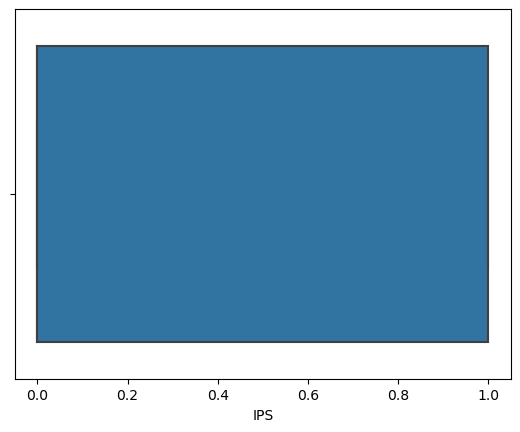

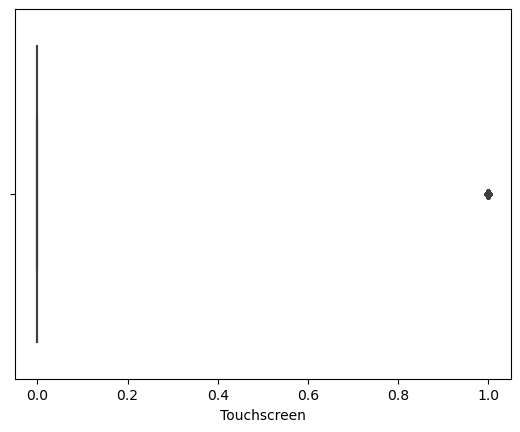

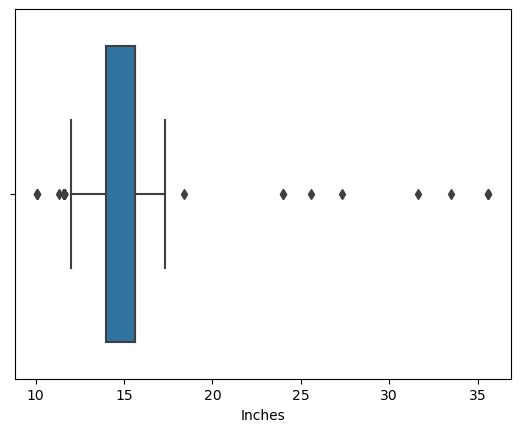

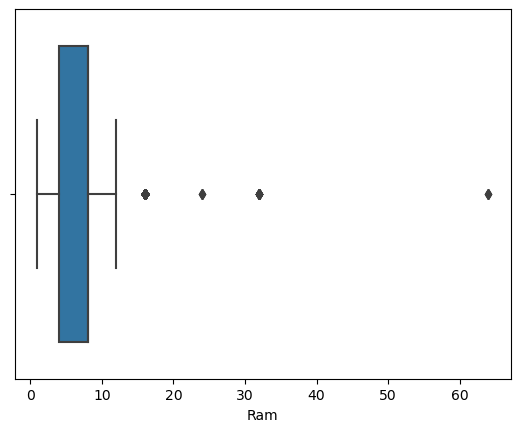

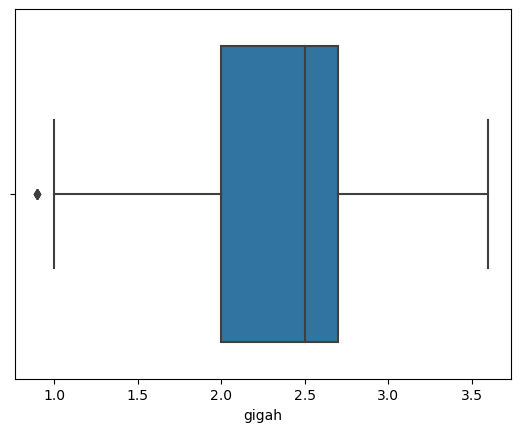

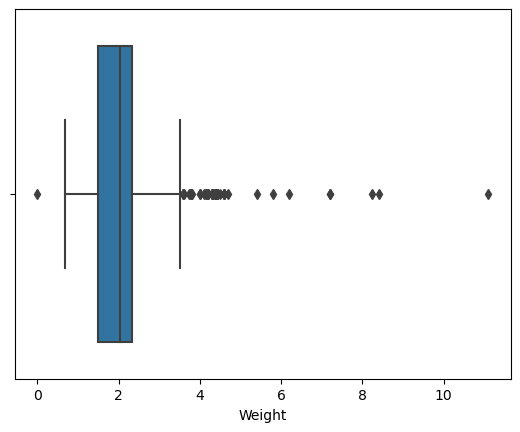

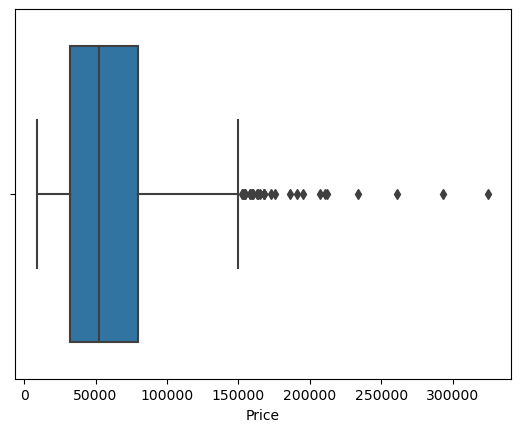

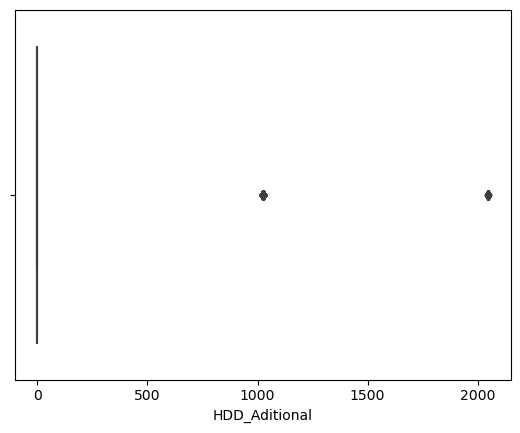

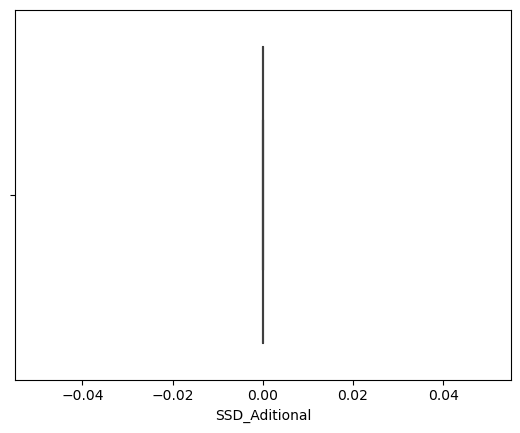

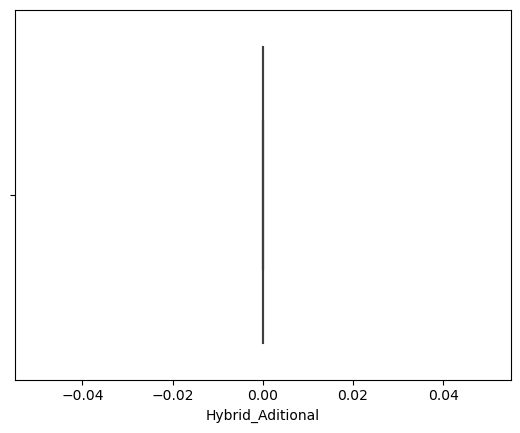

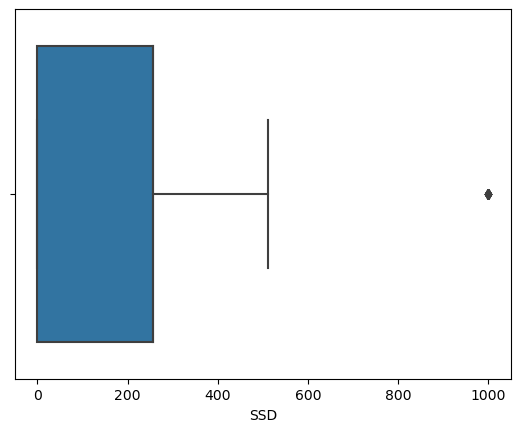

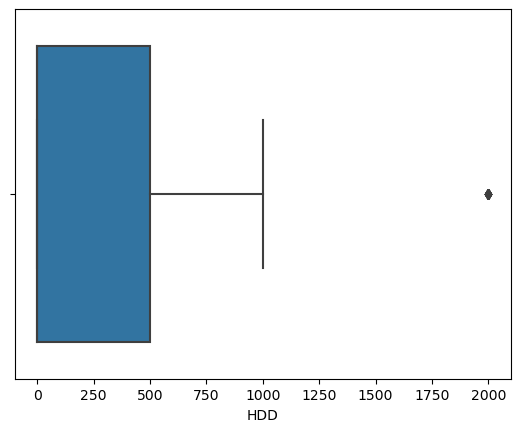

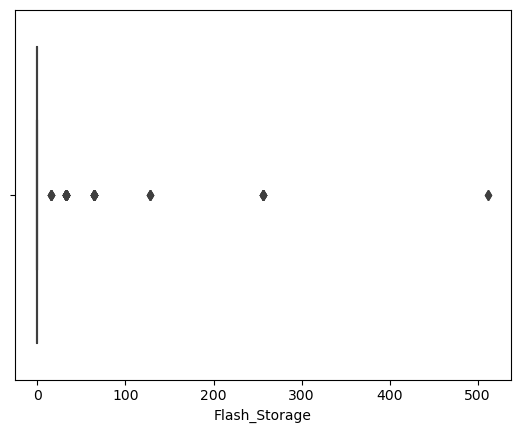

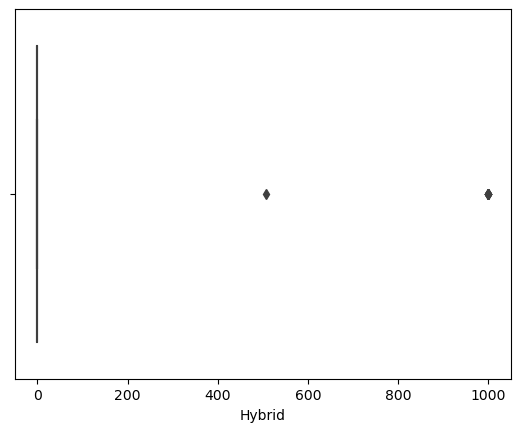

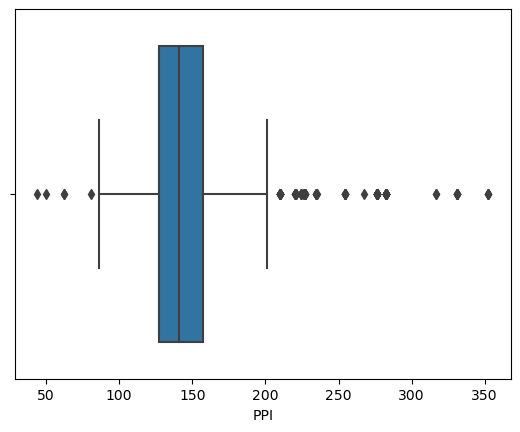

In [1320]:
for i in file2.columns:
    if file2[i].dtype !='object':
        sns.boxplot(data=file2, x=i)
        plt.show()

In [1321]:

file21 = file2[file2['Inches'] <= 23]
file22 = file21[file21['Price'] <= 160000]
file23 = file22[file22['Inches'] >= 12]
file24 = file23[file23['Weight'] <= 5]
file25 = file24[file24['PPI'] <= 200]

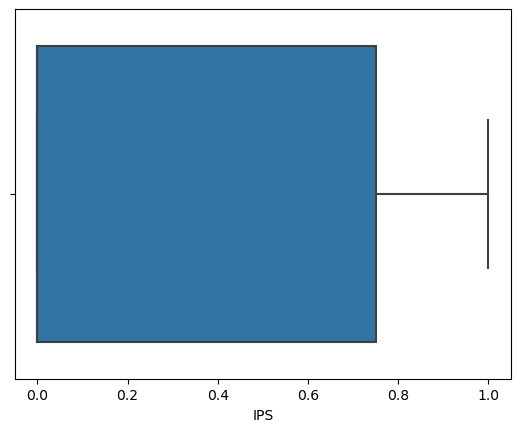

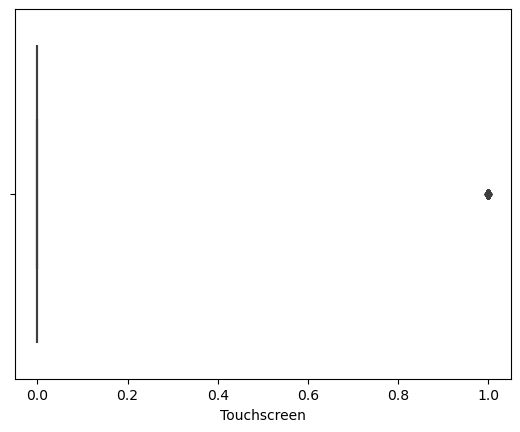

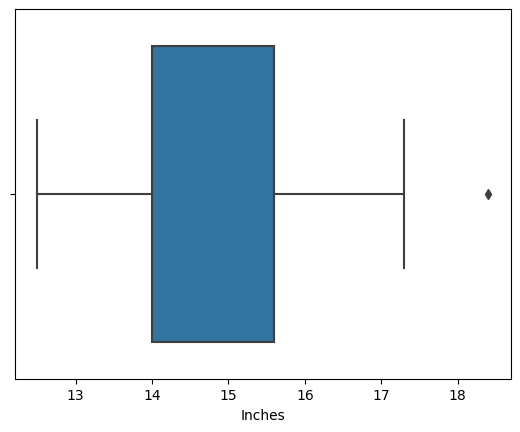

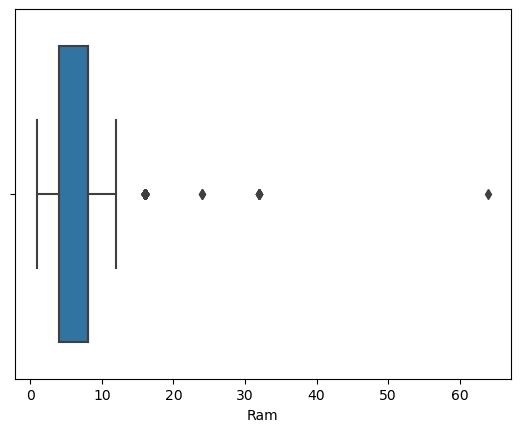

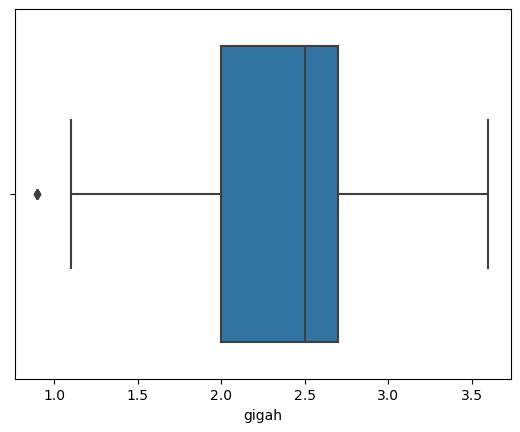

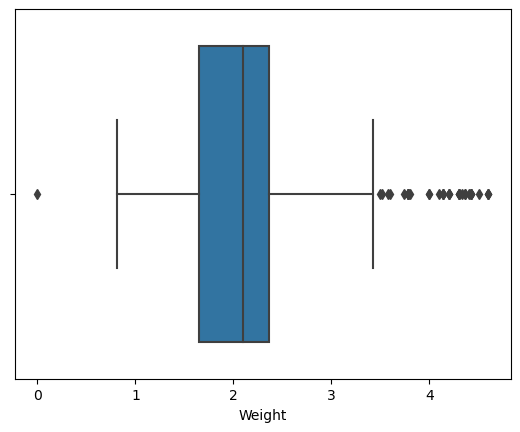

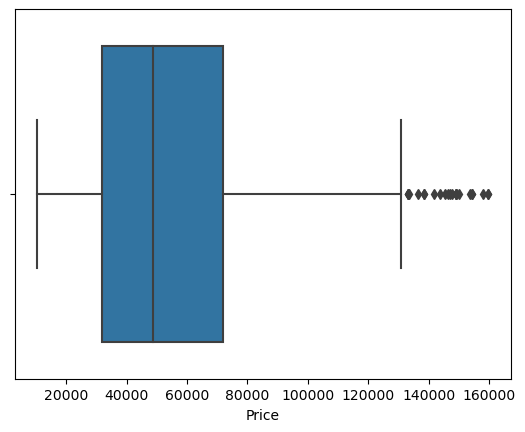

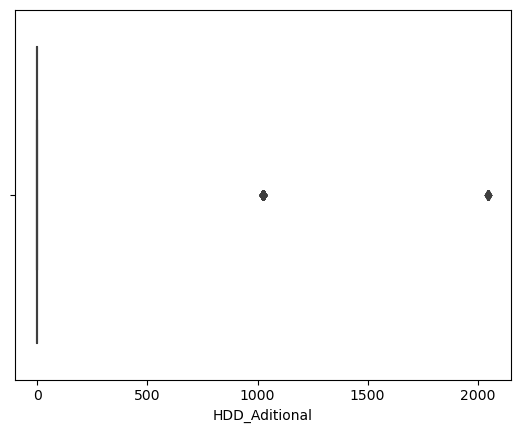

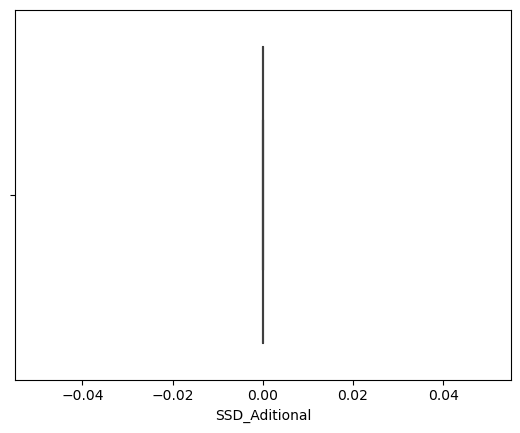

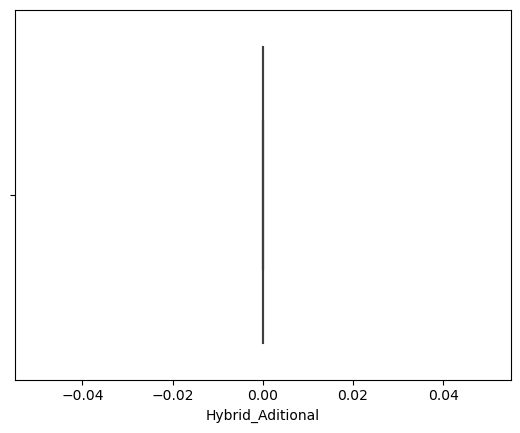

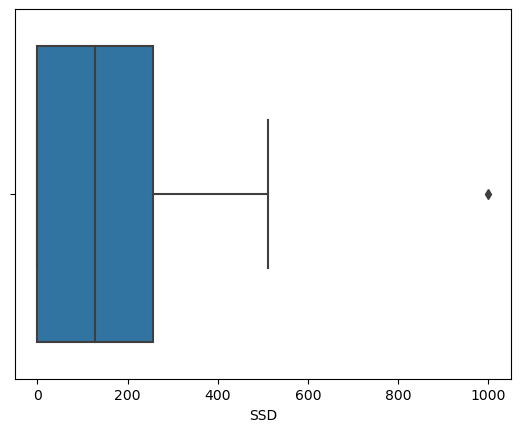

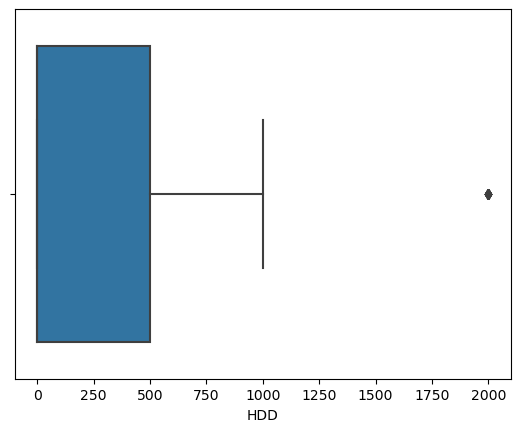

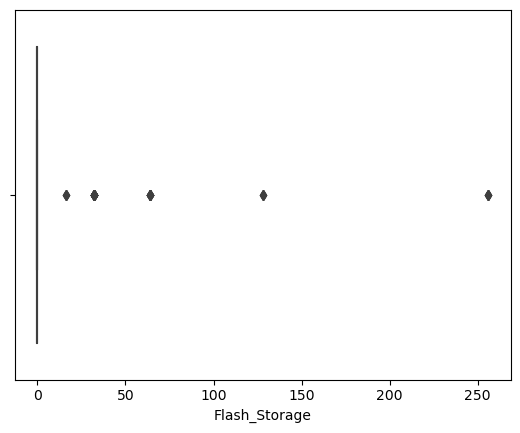

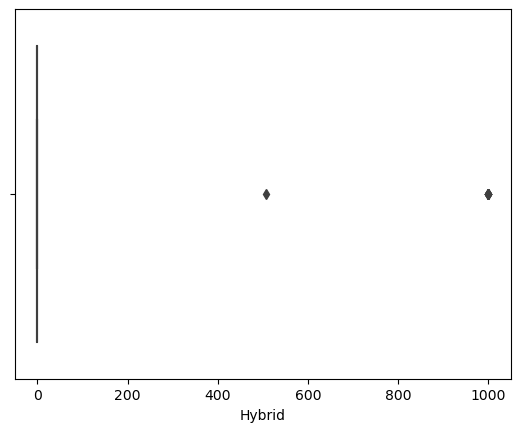

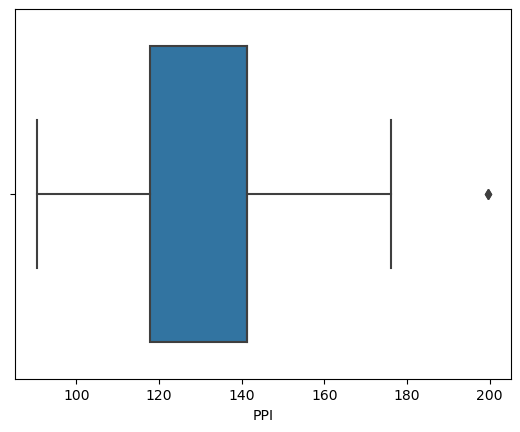

In [1322]:
for i in file25.columns:
    if file25[i].dtype !='object':
        sns.boxplot(data=file25, x=i)
        plt.show()

In [1323]:
file25 = file25.reset_index()
file25 = file25.drop(['index'], axis=1)

In [1324]:
file25['graphic_processor'].unique()

array(['Intel', 'AMD', 'Nvidia'], dtype=object)

In [1325]:
file25.isnull().sum()

IPS                  0
Touchscreen          0
Company              0
TypeName             0
Inches               0
Ram                  0
graphic_processor    0
GPU                  0
gigah                0
OpSys                0
Weight               0
Price                0
core                 0
CPU                  0
screen_varity        0
HDD_Aditional        0
SSD_Aditional        0
Hybrid_Aditional     0
SSD                  0
HDD                  0
Flash_Storage        0
Hybrid               0
PPI                  0
dtype: int64

# OneHotEncoder

In [1326]:
from sklearn.preprocessing import OneHotEncoder

In [1327]:
cate = [i for i  in file25.columns if file25[i].dtypes =='object']

categorical = file25[cate]

num = [i for i  in file25.columns if file25[i].dtypes !='object']

numerical = file25[num]

In [1328]:
ohe1 = OneHotEncoder(drop='first', sparse=False)

In [1329]:
encoded = pd.DataFrame(ohe1.fit_transform(categorical))

C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [1330]:
done = pd.merge(numerical, encoded, right_index=True, left_index=True)

In [1331]:
done.shape

(1094, 78)

# Multicollinearity check

<Axes: >

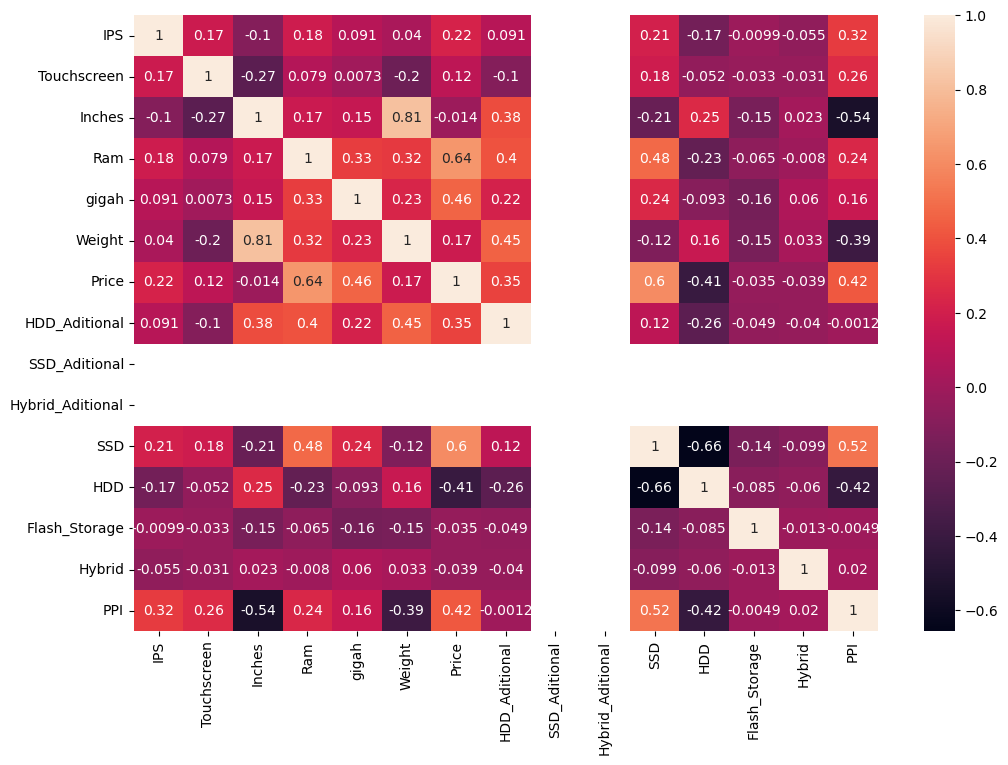

In [1332]:
plt.figure(figsize=(12,8))
sns.heatmap(numerical.corr(),annot=True)

# Drop Correlated columns

In [1334]:
done1 = done.drop(['Inches','HDD_Aditional','SSD_Aditional','Hybrid_Aditional'], axis=1)

In [1335]:
done1

,IPS,Touchscreen,Ram,gigah,Weight,Price,SSD,HDD,Flash_Storage,Hybrid,...,53,54,55,56,57,58,59,60,61,62
0,0,0,8,1.8,1.34,47895.5232,0,0,128,0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,0,8,2.5,1.86,30636.0000,256,0,0,0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0,4,3.0,2.10,21312.0000,0,500,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,0,8,1.8,1.34,61735.5360,0,0,256,0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0,16,1.8,1.30,79653.6000,512,0,0,0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,0,0,4,2.5,2.20,38378.6496,0,500,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1090,1,1,4,2.5,1.80,33992.6400,128,0,0,0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1091,0,0,2,1.6,1.50,12201.1200,0,0,64,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1092,0,0,6,2.5,2.19,40705.9200,0,1000,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# train test split

In [1336]:
x = done1.drop(['Price'], axis=1)
y = done1['Price']

In [1337]:
from sklearn.model_selection import train_test_split

In [1338]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Assumption of auto correlation

In [1339]:
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm

In [1340]:
x10 = sm.add_constant(x)

model = sm.OLS(y, x10).fit()

In [1341]:
residuals10 = model.resid

In [1342]:
dw_test = durbin_watson(residuals10)

In [1343]:
dw_test

1.8444910355930486

# Homosedesticity check

In [1344]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [1345]:
im, imp_value, f_value, f_pvalue = het_breuschpagan(residuals10, x10)

In [1346]:
if imp_value < 0.05:
    print('hetersedesticity')
else:
    print('homoscedesticity')

hetersedesticity


# Model Building

# Linear model

In [1347]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

In [1348]:
lr = LinearRegression()

In [1349]:
x_train.columns = x_train.columns.astype(str)
lr.fit(x_train, y_train)

LinearRegression()

In [1350]:
x_test.columns = x_test.columns.astype(str)
predict_train = lr.predict(x_train)
predict_test = lr.predict(x_test)

# Accuracy_score

In [1351]:
r2_score(predict_train, y_train)

0.715330789668789

In [1352]:
r2_score(predict_test, y_test)

0.7068792443321965

# assumption check(Linearity)

In [1353]:
residuals = y_train - predict_train

<Axes: ylabel='Price'>

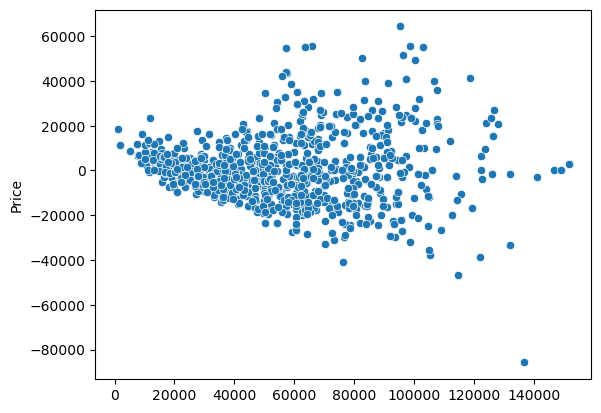

In [1354]:
sns.scatterplot(x = predict_train, y=residuals)

# Residual Normally distributed( Normality)

In [1355]:
from scipy import stats

In [1356]:
test_statistic, p_value = stats.normaltest(residuals)

In [1357]:
if p_value > 0.05:
    print('normal')
else:
    print('not')

not


<Axes: xlabel='Price', ylabel='Count'>

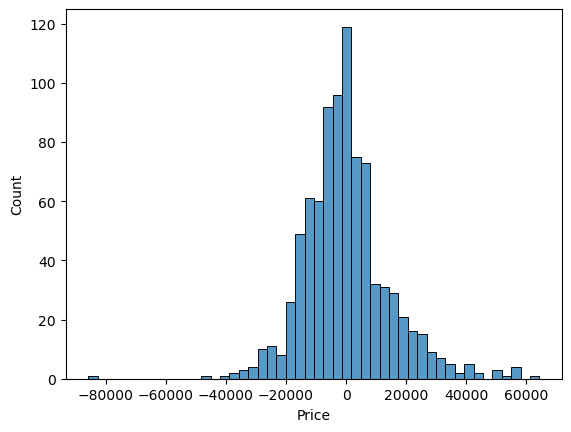

In [1358]:
sns.histplot(residuals)

# Cross Validation Score

In [1359]:
from sklearn.model_selection import cross_val_score

In [1360]:
cvs1 = cross_val_score(lr, x_test, y_test)

In [1361]:
cvs1.mean()

0.668413333462673

# Gradient boosting 

In [1362]:
from sklearn.ensemble import GradientBoostingRegressor

In [1370]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.20, random_state=1)

In [1371]:
gsr = GradientBoostingRegressor(max_depth=3)

In [1372]:
x_train2.columns = x_train2.columns.astype(str)

x_test2.columns = x_test2.columns.astype(str)

gsr.fit(x_train2, y_train2)

GradientBoostingRegressor()

# Predict result

In [1373]:
predict_xtrain2 = gsr.predict(x_train2)

predict_xtest2 = gsr.predict(x_test2)

# Accuracy result

In [1374]:
r2_score(predict_xtrain2, y_train2)*100

84.55987151269483

In [1375]:
r2_score(predict_xtest2, y_test2)*100

84.95574941178998

# MEAN Squared Error

In [1376]:
score2 = mean_squared_error(predict_xtrain2, y_train2)
score2

117698576.98967135

In [1377]:
score21 = mean_squared_error(predict_xtest2, y_test2)
score21

123111345.10458541

# Root Mean Squared

# Train

In [1378]:
root = np.sqrt(score2)
root

10848.897501113712

In [1379]:
root1 = np.sqrt(score21)
root1

11095.555195869443

# Pipline check

In [1380]:
from sklearn.compose import ColumnTransformer

In [1381]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [1384]:
step1 = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(drop='first', sparse=False), ['Company','TypeName','graphic_processor','Gpu','OpSys'])
], remainder='passthrough')





In [1386]:
pipe = Pipeline([
    ('step1', step1), 
   ('regressor', GradientBoostingRegressor())
])

In [1146]:
import pickle

#pickle.dump(file12,open('laptop.pkl','wb'))
pickle.dump(pipe,open('pipe3.pkl','wb'))